## Saudi Arabia Used Cars

Sumber data Saudi Arabia Used Cars https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view

## Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Processing
4. Modeling
5. Conclusion
6. Recommendation

## Business Problem Understanding

Context
Saudi Arabia Used Cars merupakan kumpulan data dari penjualan mobil-mobil bekas yang ada di Saudi Arabia. Data berisikan data tentang mobil bekas yang di jual seperti tipe mobil, region daerah penjualan, produsen mobil, tipe transmisi, origin, option, year, engine size, milleage, negotiable dan price. 

## Objective

Membuat model untuk memprediksi harga dari mobil bekas di Arab Saudi berdasarkan data  yang ada.
Mengetahui variable yang signifikan dalam memprediksi harga mobil bekas.
Melakukan komparasi dari berbagai macam model ML yang berbeda untuk menemukan model yang terbaik.

## Data Understanding

Variable description:
    1. Type: Nama model mobil 
    2. Region: Wilayah di mana mobil bekas di jual
    3. Make: Nama perusahaan yang memproduksi mobil
    4. Gear_Type: Automatic / Manual
    5. Origin: Negara importer (Saudi / Gulf Arabic / Other)
    6. Options: Full Options / Semi-Full / Standard
    7. Year: Tahun produksi
    8. Engine_Size: Ukuran mesin mobil bekas
    9. Mileage: Jarak rata-rata yang dapat di tempuh kendaraan (dalam km)
    10. Negotiable: Bila True, harga kendaraan adalah 0. Artinya harga masih dapat di negosiasikan.
    11. Price: Harga dari kendaraan bekas (dalam mata uang SAR)

## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.1f}'.format

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


## Data Understanding

In [3]:
#load dataset
df = pd.read_csv('C:\Purwadikha\Capstone Project Module 3\data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [4]:
#untuk memastikan jumlah kolum dan row
print('Shape:', df.shape)

Shape: (5624, 11)


In [5]:
#untuk cek tipe data dari masing-masing column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


## Data Cleaning

In [6]:
#Cek row yang ada duplikat
print('Jumlah row duplikat: ', sum(df.duplicated()))

Jumlah row duplikat:  4


In [7]:
#drop row duplikat
df.drop_duplicates(inplace = True)

print('Jumlah row duplikat: ', sum(df.duplicated()))

Jumlah row duplikat:  0


In [8]:
#mencari missing value
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [9]:
#drop kolum yang tidak penting
df = df.drop(['Negotiable'], axis = 1)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


In [10]:
#Summary statistic numerical 
df.describe()

,Year,Engine_Size,Mileage,Price
count,5620.0,5620.0,5620.0,5620.0
mean,2014.1,3.3,150922.2,53086.4
std,5.8,1.5,382963.3,70175.2
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,38000.0,0.0
50%,2016.0,3.0,103000.0,36500.0
75%,2018.0,4.5,196000.0,73000.0
max,2022.0,9.0,20000000.0,850000.0


Dapat di lihat dari data di atas bahwa Milleage memiliki max value 20,000,000 yang seharus nya mustahil untuk di capai. Untuk price juga dapat di lihat bila value dari 25% nya adalah 0.

In [11]:
#summary statistic untuk categorical
df.describe(exclude = 'number')

,Type,Region,Make,Gear_Type,Origin,Options
count,5620,5620,5620,5620,5620,5620
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2270,1430,4871,4184,2232


In [12]:
#Untuk cek harga yang 0
df[df.Price==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,0
...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,0


In [13]:
#drop column yang memiliki harga 0
df = df[df['Price'] != 0]
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


Untuk cek value yang ada di column price mari kita coba urutkan data price secara ascending

In [14]:
df.sort_values(by='Price', ascending=1, inplace = True)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


Dari hasil di atas dapat di lihat ada beberapa value yang tidak normal untuk menjadi harga mobil. Untuk mendapatkan data yang lebih akurat mari kita coba untuk drop data yang memiliki value lebih rendah dari 5000

In [15]:
df = df[df['Price']>5000]
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,5500
5432,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3,290000,6000
1717,Other,Jeddah,Honda,Manual,Saudi,Standard,2011,1.0,4200,6500
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000


Selain dari price mari kita juga coba untuk menghilangkan milleage yang lebih dari 700,000 km karena untuk milleage tersebut juga terbilang tidak normal

In [16]:
df = df[df['Mileage']<700000]
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,5500
5432,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3,290000,6000
1717,Other,Jeddah,Honda,Manual,Saudi,Standard,2011,1.0,4200,6500
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000


## Data Analysis

In [17]:
#Melihat semua variable kategorikal
kolum_kategorikal = df.select_dtypes(include = ['object'])
kolum_kategorikal.head()

,Type,Region,Make,Gear_Type,Origin,Options
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full
1629,Other,Jeddah,Other,Manual,Other,Semi Full
5432,Optima,Taef,Kia,Manual,Other,Standard
1717,Other,Jeddah,Honda,Manual,Saudi,Standard
5599,Corolla,Dammam,Toyota,Manual,Other,Standard


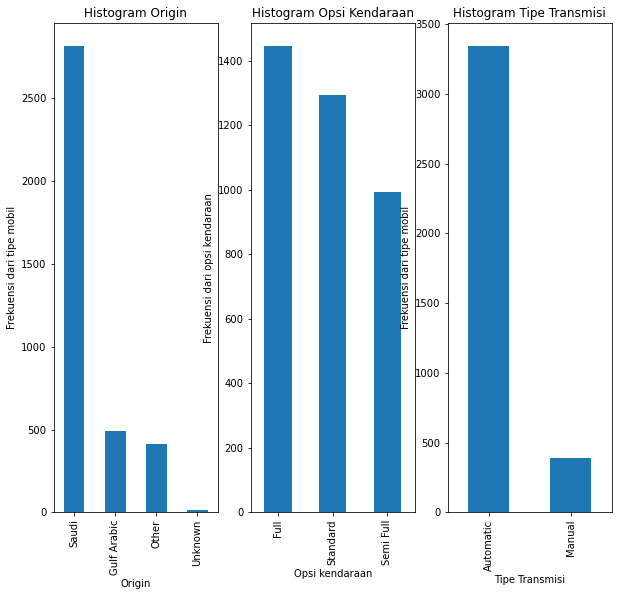

In [18]:
plt.figure(figsize=(10,9))

plt.subplot(1,3,1)
plt1 = df.Origin.value_counts().plot(kind='bar')
plt.title('Histogram Origin')
plt1.set(xlabel = 'Origin', ylabel = 'Frekuensi dari tipe mobil')

plt.subplot(1,3,2)
plt1 = df.Options.value_counts().plot(kind='bar')
plt.title('Histogram Opsi Kendaraan')
plt1.set(xlabel = 'Opsi kendaraan', ylabel = 'Frekuensi dari opsi kendaraan')

plt.subplot(1,3,3)
plt1 = df.Gear_Type.value_counts().plot(kind='bar')
plt.title('Histogram Tipe Transmisi')
plt1.set(xlabel = 'Tipe Transmisi', ylabel = 'Frekuensi dari tipe mobil')

plt.show()

Berdasarkan plot di atas kita dapat melihat hal berikut:
1. Origin dari kendaraan mayoritas masih berasal dari Saudi
2. Untuk opsi kendaraan masih opsi full yang menjadi pilihan utama
3. Transmisi yang lebih banyak di gunakan adalah automatic

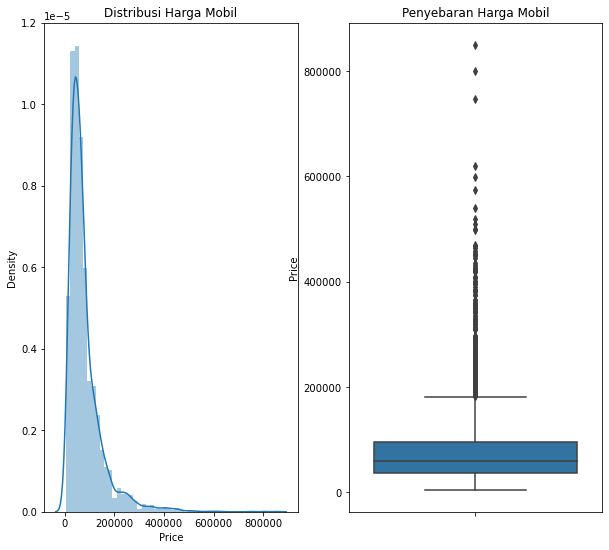

In [19]:
plt.figure(figsize=(10,9))

plt.subplot(1,2,1)
plt.title('Distribusi Harga Mobil')
sns.distplot(df.Price)
plt.ticklabel_format(useOffset=False, style = 'plain', axis = ('x'))

plt.subplot(1,2,2)
plt.title('Penyebaran Harga Mobil')
sns.boxplot(y=df.Price)
plt.ticklabel_format(useOffset=False, style = 'plain', axis = ('y'))

plt.show()

In [20]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     3730.0
mean     79763.2
std      72758.0
min       5500.0
25%      36500.0
50%      59000.0
75%      95000.0
85%     129000.0
90%     155000.0
100%    850000.0
max     850000.0
Name: Price, dtype: float64


Bila kita lihat plot nya adalah right-skewed, yang dapat di artikan bahwa kebanyakan price di dataset nya adalah rendah (di bawah 95.000)
Bila di lihat dari mean dan median nya juga terdapat perbedaan yang signifikan
Data point yang ada juga melebar jauh dari mean, yang menunjukan ada nya varian yang tinggi di dalam harga mobil (85% harga ada di bawah 129.000, dan sisa 15% nya ada di antara 129.000 sampai 850.000)

Text(0, 0.5, 'Count Mobil')

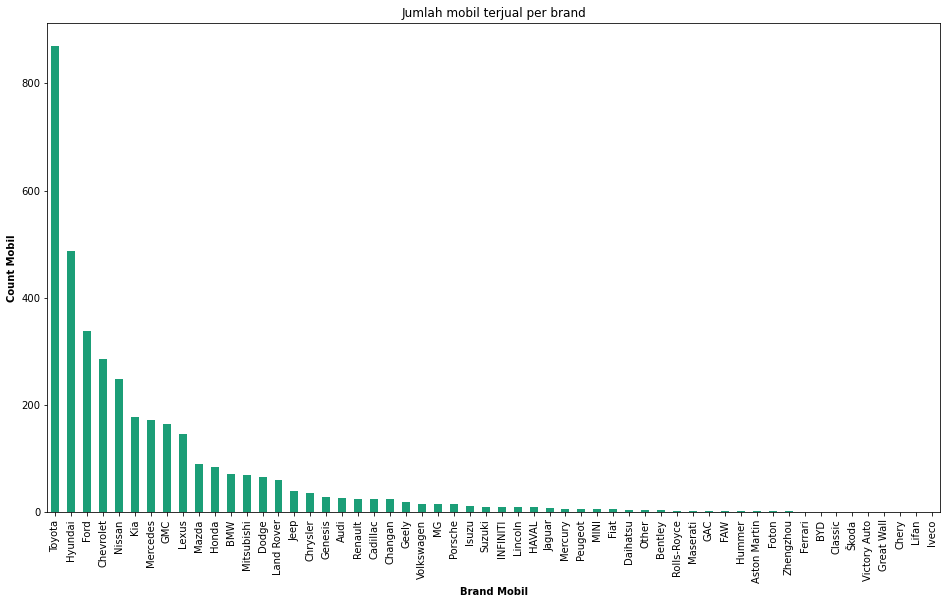

In [21]:
#Melihat semua brand mobil yang tersedia

plt.rcParams['figure.figsize'] = [16,9]
ax = df['Make'].value_counts().plot(kind = 'bar', colormap = 'Dark2')
ax.title.set_text('Jumlah mobil terjual per brand')
plt.xlabel('Brand Mobil', fontweight = 'bold')
plt.ylabel('Count Mobil', fontweight = 'bold')

Toyota, Hyundai dan Ford adalah brand yang paling banyak terjual
Victory Auto, Chery, Ferrari, BYD, Lifan, Iveco, Great Wall, Classic dan Skoda adalah brand yang memiliki penjualan paling sedikit

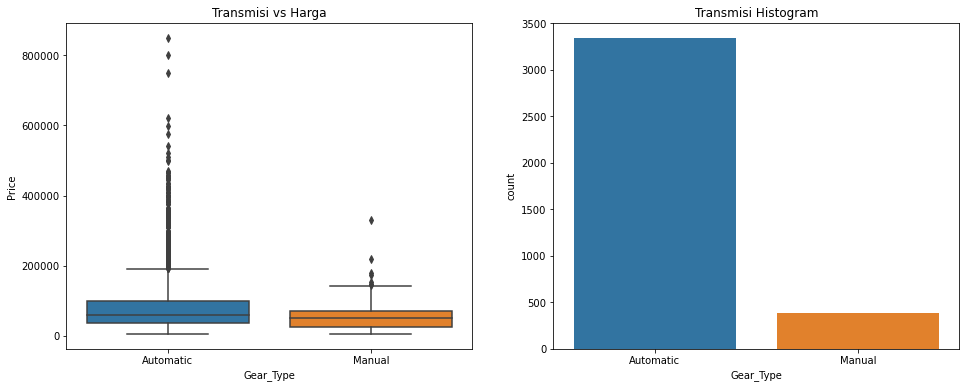

In [22]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Transmisi vs Harga')
sns.boxplot(x=df.Gear_Type, y = df.Price)

plt.subplot(1,2,2)
plt.title('Transmisi Histogram')
sns.countplot(df.Gear_Type)

plt.ticklabel_format(useOffset=False, style = 'plain', axis = 'y')
plt.show()

Hanya sebagian kecil mobil manual yang terjual tetapi perbedaan average price manual tidak sebesar mobil automatic.

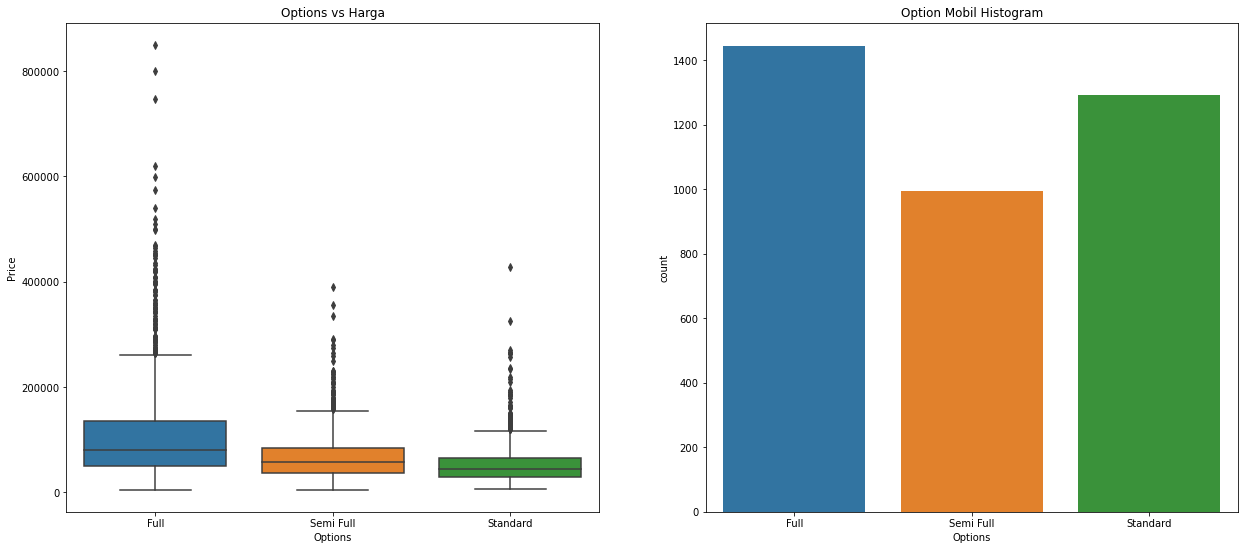

In [23]:
#Melihat hubungan antara Car Option dan harga
plt.figure(figsize=(21,9))

plt.subplot(1,2,1)
plt.title('Options vs Harga')
sns.boxplot(x=df.Options, y = df.Price)

plt.subplot(1,2,2)
plt.title('Option Mobil Histogram')
sns.countplot(df.Options)

plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.show()
                    

Opsi Mobil Full memiliki penyebaran harga yang lebih tinggi bila di bandingkan dengan opsi lain nya

<Figure size 1512x648 with 0 Axes>

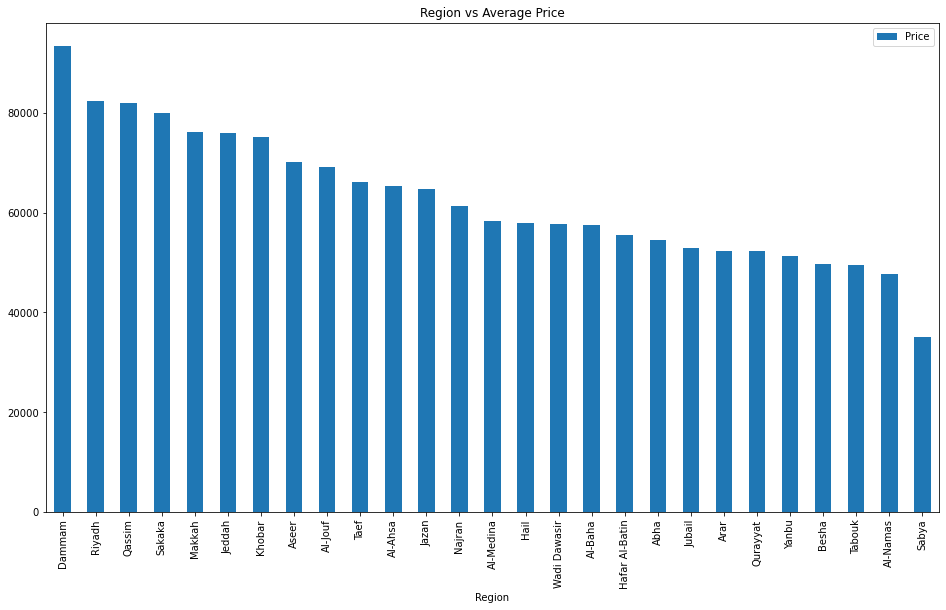

In [24]:
plt.figure(figsize=(21,9))

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
fig.plot.bar()
plt.title('Region vs Average Price')
plt.show()

Dari data di atas dapat di lihat bila Dammam, Riyadh dan Qassim merupakan kota di mana mobil paling banyak terjual

<Figure size 1512x504 with 0 Axes>

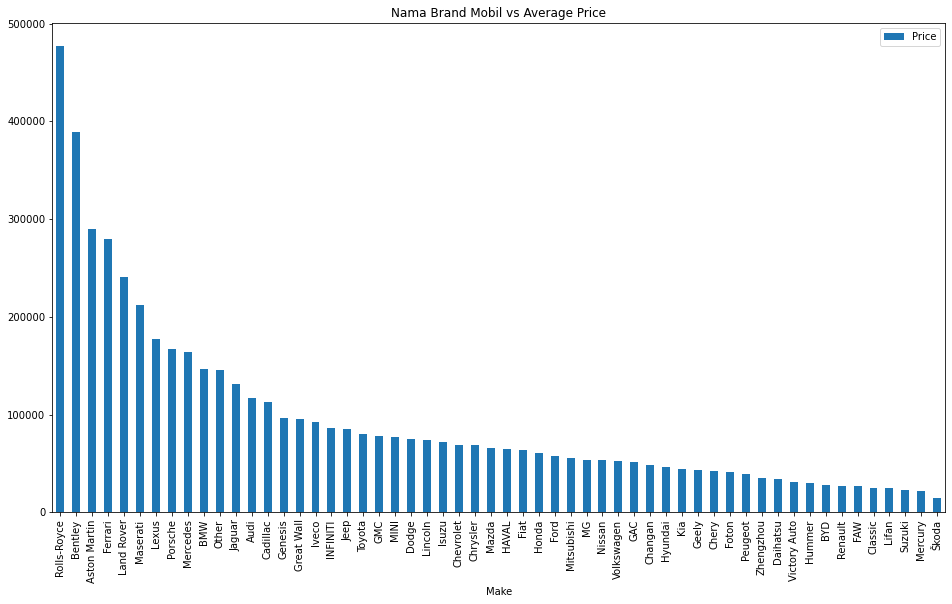

In [25]:
plt.figure(figsize=(21, 7))

tes = pd.DataFrame(df.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
tes.plot.bar()
plt.title('Nama Brand Mobil vs Average Price')
plt.show()

Skoda, Merury dan Suzuki merupkaan brand mobil yang memiliki average harga terendah. Sedangkan untuk yang termahal ada Rolls-Royce, Bentley dan Aston Martin

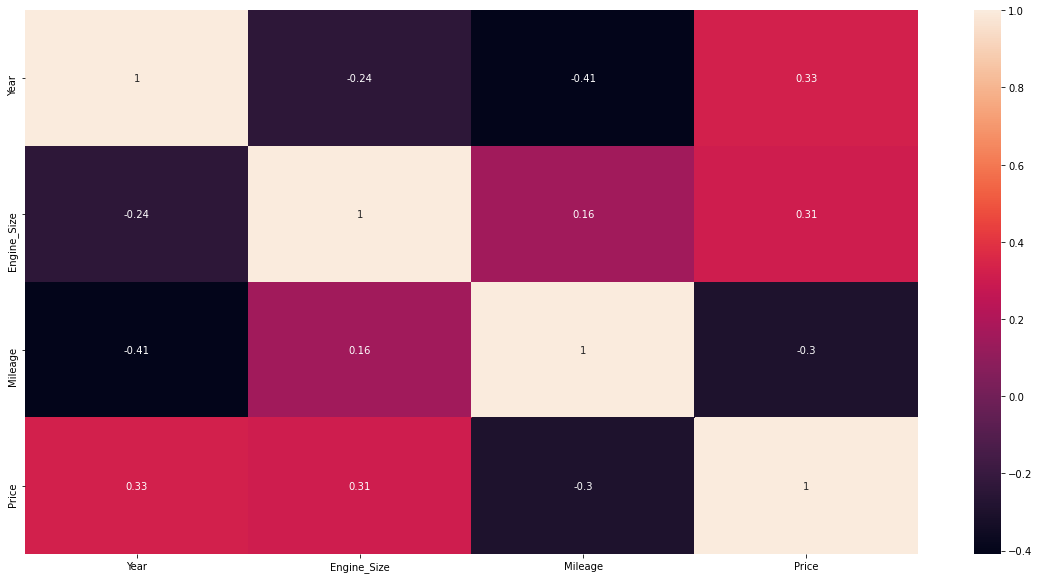

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Dari Heatmap di atas kita dapat lihat bahwa Year, dan Engine_Size memiliki korelasi yang positive dengan price. Sedangkan Mileage memiliki korelasi yang negative dengan price.

## Feature Engineering

In [27]:
#Mengambil variable yang signifikan
df_sig = df[['Make','Year', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [28]:
df_sig

,Make,Year,Options,Engine_Size,Gear_Type,Mileage,Price
62,Mercedes,1986,Full,3.0,Automatic,500000,5500
1629,Other,2021,Semi Full,1.2,Manual,3000,5500
5432,Kia,2006,Standard,1.3,Manual,290000,6000
1717,Honda,2011,Standard,1.0,Manual,4200,6500
5599,Toyota,1997,Standard,1.3,Manual,32500,7000
...,...,...,...,...,...,...,...
4653,Land Rover,2019,Full,5.0,Automatic,4200,599000
2120,Rolls-Royce,2016,Full,6.0,Automatic,40000,620000
4273,Mercedes,2021,Full,3.0,Automatic,2500,748000
4684,Mercedes,2019,Full,4.0,Automatic,39000,800000


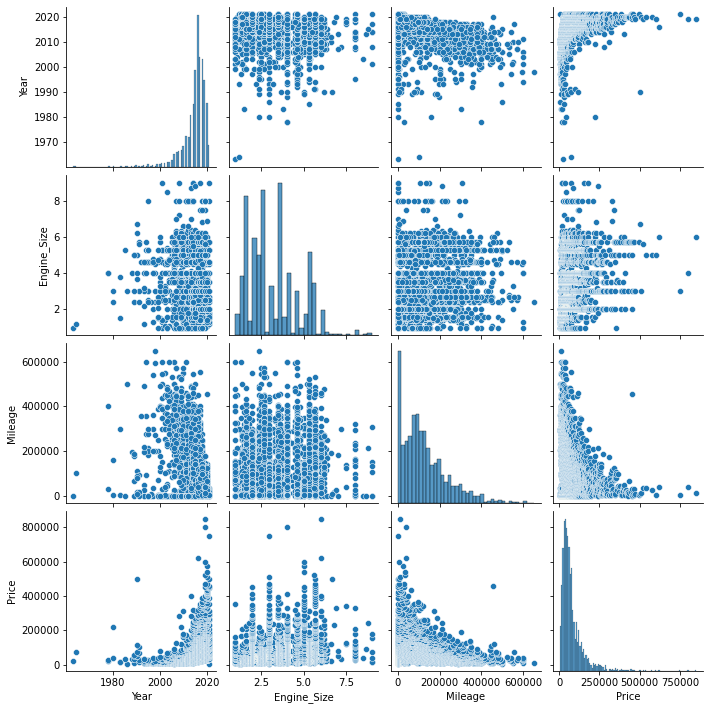

In [29]:
#Mencari hubungan di dataset
sns.pairplot(df_sig)
plt.show()

In [30]:
df_col = ['Options', 'Gear_Type', 'Make'] # Variable kategorikal

# Mencari dummy variable untuk fitur kategorikal dan menyimpan nya di variable dummy

dummy = pd.get_dummies(df_sig[df_col])
dummy.shape

(3730, 61)

In [31]:
# Masukan hasil nya ke dalam datafraem original

df_sig = pd.concat([df_sig, dummy], axis = 1)
df_sig.shape

(3730, 68)

In [32]:
# Drop variable kategorikal yang original karena sudah di masukkan data dummy

df_sig.drop(df_col, axis = 1, inplace = True)
df_sig.shape

(3730, 65)

In [33]:
df_sig.head()

,Year,Engine_Size,Mileage,Price,Options_Full,Options_Semi Full,Options_Standard,Gear_Type_Automatic,Gear_Type_Manual,Make_Aston Martin,...,Make_Peugeot,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Suzuki,Make_Toyota,Make_Victory Auto,Make_Volkswagen,Make_Zhengzhou,Make_Škoda
62,1986,3.0,500000,5500,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1629,2021,1.2,3000,5500,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,2006,1.3,290000,6000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1717,2011,1.0,4200,6500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5599,1997,1.3,32500,7000,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Model Building & Machine Learning

Splitting dataset menjadi Training dan Testing sets

In [34]:
X = df_sig.drop(['Price'] , axis=1)
y = df_sig['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

## Random Forest Model

In [35]:
# Buat model nya
df_forest = RandomForestRegressor(random_state = 42, criterion = 'mse')
df_forest.fit(X_train, y_train) # fit model

df_forest_test = df_forest.predict(X_test)   # Prediksi price dari dataset test

In [36]:
#Model Evaluation
print(r2_score(y_test, df_forest_test))

0.7886964160845306


Akurasi dari Random Forrest Model (R-squared) adalah 78,87%

## Linear Regression Model

In [37]:
model = LinearRegression()

model.fit(X_train, y_train)
df_lm_test = model.predict(X_test)

In [38]:
#Model evaluation
print(r2_score(y_test, df_lm_test))

0.6262095317221894


Akurasi dari model Linear regression yang di gunakan adalah 62.62%

## Conclusion

Berdasarkan pemodelan yang sudah di lakukan, fitur Year dan Engine_size menjadi fitur yang paling berpengaruh terhadap Price.

Model machine learning yang di gunakan adalah Random Forrest Model dan Linear Regression Model. Jika dilihat dari hasil nya dapat di lihat bahwa Random Forrest Model memiliki tingkat akurasi yang lebih baik di bandingkan dengan Linear Regression Model. Di mana Random Forrest Model memiliki tingkat akurasi sebesar 78.87% dan Linear Regression Model memiliki tingkat akurasi sebesar 62.62%. Dari model yang sudah di lakukan dapat di lihat juga bila semakin baru mobil nya (dari table Year) makan akan berpengaruh terhadap price yang membuat price nya lebih tinggi. Begitupula dengan mileage nya, semakin rendah mileage maka akan membuat harga mobil menjadi semakin tinggi juga. 

## Recommendation

Dari hasil testing di atas dapat di sarankan untuk menggunakan model Random Forest Model karena memiliki persentase R-Squared yang lebih besar di bandingkan Linear Regression Model. Jika memungkinkan, dapat di tambahkan fitur tipe bahan bakar kendaraan yang mungkin memiliki korelasi dengan variable Price agar dapat mendapatkan data yang lebih akurat.

In [39]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(df_forest, open(filename, 'wb'))

In [41]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7886964160845306
